In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
result = pd.read_csv('~/all_2k_prediction.out.label.prediction_combined',sep=' ',header=None,names=['name','length','probability','prediction','vfam','pfam','diamond','label',
                                                                                       'score_euk_non_euk','pred_euk_non_euk','score_non_euk_virus','pred_non_euk_virus',
                                                                                      'score_virus_non_virus','pred_virus_non_virus'])

In [5]:
len(result)

213723

### 6913 virus contigs....

In [115]:
len(result[result.label==1.0])

6913

altogether 213723 >=2K contigs

In [6]:
result["hybrid_probability"] = (result["score_euk_non_euk"] * result["probability"])**0.5

In [7]:
result["hybrid_prediction"] = (result.hybrid_probability >0.5)

In [8]:
result["hybrid_prediction"]==0

0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
          ...  
213693     True
213694     True
213695     True
213696     True
213697     True
213698     True
213699    False
213700    False
213701     True
213702     True
213703    False
213704    False
213705     True
213706    False
213707     True
213708     True
213709    False
213710     True
213711     True
213712     True
213713    False
213714    False
213715    False
213716     True
213717     True
213718    False
213719     True
213720    False
213721    False
213722    False
Name: hybrid_prediction,

In [9]:
result.head()

,name,length,probability,prediction,vfam,pfam,diamond,label,score_euk_non_euk,pred_euk_non_euk,score_non_euk_virus,pred_non_euk_virus,score_virus_non_virus,pred_virus_non_virus,hybrid_probability,hybrid_prediction
0,NODE_1_length_91451_cov_163.114_g0_i0,91451,0.000375,0.0,0.0,0.0,0.0,0.0,0.000025,0.0,0.996004,1.0,0.001954,0.0,0.000097,False
1,NODE_2_length_74096_cov_303.895_g1_i0,74096,0.000088,0.0,0.0,0.0,0.0,0.0,0.000012,0.0,0.995278,1.0,0.000529,0.0,0.000032,False
2,NODE_3_length_66420_cov_268.59_g1_i1,66420,0.000041,0.0,0.0,0.0,0.0,0.0,0.000009,0.0,0.996629,1.0,0.000761,0.0,0.000019,False
3,NODE_4_length_61338_cov_317.585_g2_i0,61338,0.000056,0.0,0.0,0.0,0.0,0.0,0.000008,0.0,0.991967,1.0,0.000477,0.0,0.000021,False
4,NODE_5_length_59036_cov_197.701_g0_i1,59036,0.000040,0.0,0.0,0.0,0.0,0.0,0.000008,0.0,0.990354,1.0,0.000617,0.0,0.000018,False


In [10]:

from sklearn.datasets import load_svmlight_file
from sklearn.externals import joblib
import argparse
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import classification_report

### Check the Precision-recall curve of old model and hybrid model

In [11]:
auprc_old = average_precision_score(result.label, result.probability)
auprc_new = average_precision_score(result.label, result.hybrid_probability)

In [13]:
precision_old, recall_old, thresholds_old = precision_recall_curve(result.label, result.probability)

In [17]:
precision_new, recall_new, thresholds_new = precision_recall_curve(result.label, result.hybrid_probability)

In [14]:
precision_old_nonvirus, recall_old_nonvirus, thresholds_old_nonvirus = precision_recall_curve(result.label==0, 
                                                                                              result.probability==0)

In [15]:
precision_new_nonvirus, recall_new_nonvirus, thresholds_new_nonvirus = precision_recall_curve(result.label==0, 
                                                                                              result.hybrid_probability==0)

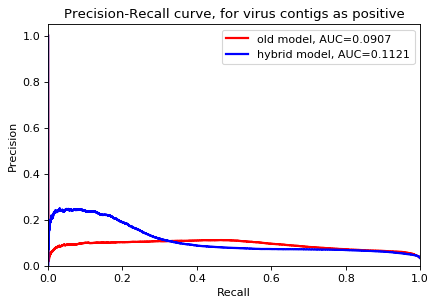

In [20]:
        lw = 2
        plt.figure(figsize=(6, 4), dpi=80)
        plt.clf()
        plt.plot(recall_old, precision_old, lw=lw, color='red',
                 label='old model, AUC={0:0.4f}'.format(auprc_old))
        plt.plot(recall_new, precision_new, lw=lw, color='blue',
                 label='hybrid model, AUC={0:0.4f}'.format(auprc_new))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('Precision-Recall curve, for virus contigs as positive')
        plt.legend(loc="upper right")


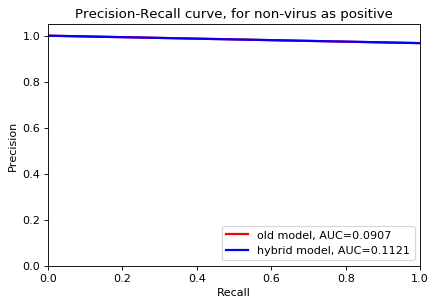

In [21]:
        lw = 2
        plt.figure(figsize=(6, 4), dpi=80)
        plt.clf()
        plt.plot(recall_old_nonvirus, precision_old_nonvirus, lw=lw, color='red',
                 label='old model, AUC={0:0.4f}'.format(auprc_old))
        plt.plot(recall_new_nonvirus, precision_new_nonvirus, lw=lw, color='blue',
                 label='hybrid model, AUC={0:0.4f}'.format(auprc_new))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('Precision-Recall curve, for non-virus as positive')
        plt.legend(loc="lower right")

### Check confusion matrix of new model and hybrid model (cutoff = 0.5)

In [22]:
confusion_matrix(result.label, result.prediction)

array([[139347,  67463],
       [  1536,   5377]])

In [23]:
confusion_matrix(result.label, result.hybrid_prediction)

array([[155509,  51301],
       [  2870,   4043]])

In [24]:
print(classification_report(result.label, result.prediction, target_names=['non-virus','virus']))

             precision    recall  f1-score   support

  non-virus       0.99      0.67      0.80    206810
      virus       0.07      0.78      0.13      6913

avg / total       0.96      0.68      0.78    213723



In [25]:
print(classification_report(result.label, result.hybrid_prediction, target_names=['non-virus','virus']))

             precision    recall  f1-score   support

  non-virus       0.98      0.75      0.85    206810
      virus       0.07      0.58      0.13      6913

avg / total       0.95      0.75      0.83    213723



### Check score distribution of positive/negative contigs from old model and hybrid model

### Using MEGAN annotation to check model performance 

In [27]:
from ete2 import NCBITaxa
ncbi = NCBITaxa()

NCBI database not present yet (first time used?)
Done. Parsing...


Loading node names...
1650855 names loaded.
226901 synonyms loaded.
Loading nodes...
1650855 nodes loaded.
Linking nodes...
Tree is loaded.
Updating database: /Users/qingpeng/.etetoolkit/taxa.sqlite ...
1650000 generating entries...   generating entries...   generating entries...      generating entries...                              generating entries...                                                               generating entries...  generating entries...    generating entries...       generating entries...     generating entries...  generating entries...        generating entries...       generating entries...    

Inserting synonyms:       5000 


Uploading to /Users/qingpeng/.etetoolkit/taxa.sqlite



Inserting taxid merges:  100000                                             

Inserting taxids:        50000        

Inserting taxids:       1650000                                                                                                                                                                                                                                                                                                                                      

In [28]:
def get_top_label(tax_id):
    lineage = ncbi.get_lineage(tax_id)
    for i in lineage:
        if i == 2759:
            return "Eukaryota"
        elif i == 10239:
            return "Virus"
        elif i == 2157:
            return "Archaea"
        elif i == 2:
            return "Bacteria"
        elif i == 12884:
            return "Viroids"
        elif i == 28384:
            return "other"
        elif i == 12908:
            return "unclassified"
    else:
        return "N/A"

In [29]:
def get_ranks(tax_id):
    ranks = ncbi.get_rank([tax_id])
    try:
        return ranks.values()[0]
    except:
        return tax_id

In [30]:
def get_name(tax_id):
    ranks = ncbi.get_taxid_translator([tax_id])
    try:
        return ranks.values()[0]
    except:
        return tax_id

In [31]:
megan_annot = pd.read_csv('~/Dropbox/Development/Github/jgi-ViCA/extra/model_tuning/Micromonas/all_2k_contigs.fa.diamond-ex-all_tax_ID.txt',sep='\t',header=None,names=['name','tax_id'])

In [32]:
megan_annot['rank'] = megan_annot['tax_id'].apply(get_ranks)

In [33]:
megan_annot['tax_name']= megan_annot['tax_id'].apply(get_name)

In [34]:
megan_annot['top_label']= megan_annot['tax_id'].apply(get_top_label)

In [35]:
new_table = pd.merge(result,megan_annot, on=['name'])

In [36]:
new_table.head()

,name,length,probability,prediction,vfam,pfam,diamond,label,score_euk_non_euk,pred_euk_non_euk,score_non_euk_virus,pred_non_euk_virus,score_virus_non_virus,pred_virus_non_virus,hybrid_probability,hybrid_prediction,tax_id,rank,tax_name,top_label
0,NODE_1_length_91451_cov_163.114_g0_i0,91451,0.000375,0.0,0.0,0.0,0.0,0.0,0.000025,0.0,0.996004,1.0,0.001954,0.0,0.000097,False,1236,class,Gammaproteobacteria,Bacteria
1,NODE_2_length_74096_cov_303.895_g1_i0,74096,0.000088,0.0,0.0,0.0,0.0,0.0,0.000012,0.0,0.995278,1.0,0.000529,0.0,0.000032,False,254161,species,Pseudomonas pachastrellae,Bacteria
2,NODE_3_length_66420_cov_268.59_g1_i1,66420,0.000041,0.0,0.0,0.0,0.0,0.0,0.000009,0.0,0.996629,1.0,0.000761,0.0,0.000019,False,254161,species,Pseudomonas pachastrellae,Bacteria
3,NODE_4_length_61338_cov_317.585_g2_i0,61338,0.000056,0.0,0.0,0.0,0.0,0.0,0.000008,0.0,0.991967,1.0,0.000477,0.0,0.000021,False,286,genus,Pseudomonas,Bacteria
4,NODE_5_length_59036_cov_197.701_g0_i1,59036,0.000040,0.0,0.0,0.0,0.0,0.0,0.000008,0.0,0.990354,1.0,0.000617,0.0,0.000018,False,286,genus,Pseudomonas,Bacteria


In [ ]:
new_table['no_rank_label'] = predict_nonvirus_rank['rank'].map(convert_rank)

### non-virus data frame... non-virus and annotated as something rather than "no rank" by MEGAN

In [141]:
df_nonvirus = new_table[new_table.label==0.0][new_table['rank']!= 'no rank']

/Users/qingpeng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [145]:
len(df_nonvirus)

165965

In [146]:
df_nonvirus_subsample = df_nonvirus.sample(n=6913, replace=False)

In [147]:
df_nonvirus_subsample.to_csv('df_nonvirus_subsample.csv')

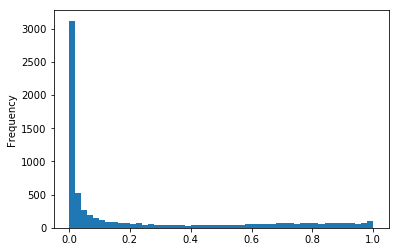

In [160]:
df_nonvirus_subsample.hybrid_probability.plot.hist(bins=50)

### no-rank data frame... annotated as "no rank" by MEGAN

In [143]:
df_no_rank = new_table[new_table.label==0.0][new_table['rank']== 'no rank']

/Users/qingpeng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [144]:
len(df_no_rank)

35296

In [148]:
df_no_rank_subsample = df_no_rank.sample(n=6913, replace=False)

In [149]:
df_no_rank_subsample.to_csv('df_no_rank_subsample.csv')

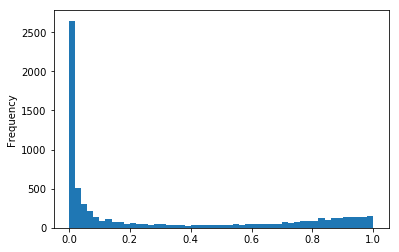

In [159]:
df_no_rank_subsample.hybrid_probability.plot.hist(bins=50)

### Virus contigs...  has pfam hits or annotated as "virus" by MEGAN

In [154]:
df_virus = result[result.label==1.0]

In [157]:
df_virus.head()


,name,length,probability,prediction,vfam,pfam,diamond,label,score_euk_non_euk,pred_euk_non_euk,score_non_euk_virus,pred_non_euk_virus,score_virus_non_virus,pred_virus_non_virus,hybrid_probability,hybrid_prediction
1096,NODE_1097_length_5129_cov_20.4539_g781_i0,5129,0.830501,1.0,1.0,0.0,0.0,1.0,0.999996,1.0,0.404406,0.0,0.018131,0.0,0.911316,True
1189,NODE_1190_length_4867_cov_31.1845_g863_i0,4867,0.003411,0.0,1.0,0.0,0.0,1.0,0.053115,0.0,0.747973,1.0,0.000995,0.0,0.013460,False
1387,NODE_1388_length_4479_cov_77.7475_g1017_i0,4479,0.995234,1.0,0.0,1.0,1.0,1.0,0.974094,1.0,0.019869,0.0,0.000540,0.0,0.984607,True
1701,NODE_1702_length_3955_cov_32.4023_g1269_i0,3955,0.094340,0.0,0.0,1.0,1.0,1.0,0.792640,1.0,0.633441,1.0,0.019717,0.0,0.273456,False
1731,NODE_1732_length_3910_cov_62.4519_g1295_i0,3910,0.985221,1.0,0.0,1.0,1.0,1.0,0.960621,1.0,0.178854,0.0,0.000591,0.0,0.972844,True


In [155]:
len(df_virus)

6913

In [156]:
df_virus.to_csv('df_virus.csv')

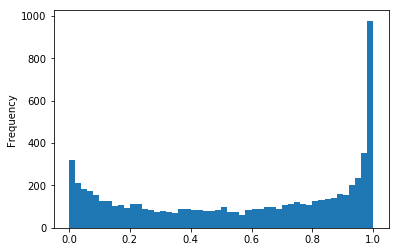

In [158]:
df_virus.hybrid_probability.plot.hist(bins=50)

In [162]:
balaced_virus_nonvirus = pd.concat([df_virus,df_nonvirus_subsample])

In [163]:
matrix = confusion_matrix(balaced_virus_nonvirus.label, balaced_virus_nonvirus.hybrid_prediction)

In [164]:
matrix

array([[5349, 1564],
       [2870, 4043]])

In [166]:
auprc_balaced_virus_nonvirus = average_precision_score(balaced_virus_nonvirus.label, balaced_virus_nonvirus.hybrid_probability)

In [167]:
auprc_balaced_virus_nonvirus

0.77060601279976737

In [168]:
precision_balaced_virus_nonvirus, recall_balaced_virus_nonvirus, thresholds_balaced_virus_nonvirus = precision_recall_curve(
    balaced_virus_nonvirus.label, balaced_virus_nonvirus.hybrid_probability)

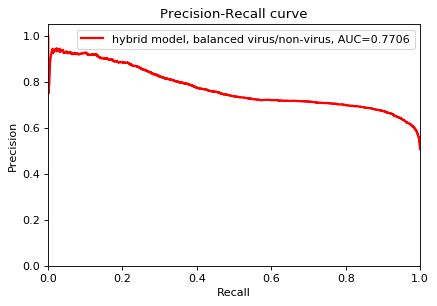

In [169]:
        lw = 2
        plt.figure(figsize=(6, 4), dpi=80)
        plt.clf()
        plt.plot(recall_balaced_virus_nonvirus, precision_balaced_virus_nonvirus, lw=lw, color='red',
                 label='hybrid model, balanced virus/non-virus, AUC={0:0.4f}'.format(auprc_balaced_virus_nonvirus))

        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('Precision-Recall curve')
        plt.legend(loc="upper right")




In [38]:
len(new_table[new_table.top_label=='Eukaryota'])

40920

In [39]:
len(new_table[new_table.top_label=='Virus'])

6619

In [40]:
len(new_table[new_table.top_label=='Archaea'])

5122

In [41]:
len(new_table[new_table.top_label=='Bacteria'])

144150

In [42]:
len(new_table[new_table.top_label=='Viroids'])

0

In [43]:
len(new_table[new_table.top_label=='other'])

0

In [44]:
len(new_table[new_table.top_label=='unclassified'])

187

#### most of the virus labled contigs are from MEGAN/Diamond approach annotation

In [45]:
len(new_table[new_table.diamond==1.0])

6619

In [46]:
len(new_table[new_table.label==1.0])

7041

In [47]:
len(new_table[new_table.vfam==1.0])

104

In [48]:
len(new_table[new_table.pfam==1.0])

1369

### Check the performance of the Euk/non-euk model

In [49]:
new_table["euk_label"] = (new_table.top_label!='Eukaryota')

In [50]:
matrix = confusion_matrix(new_table.euk_label, new_table.pred_euk_non_euk)

In [51]:
matrix

array([[23114, 17806],
       [83476, 83906]])

In [52]:
auprc_euk = average_precision_score(new_table.euk_label, new_table.score_euk_non_euk)

In [53]:
auprc_euk

0.79372065336807407

In [54]:
precision_euk, recall_euk, thresholds_euk = precision_recall_curve(new_table.euk_label, new_table.score_euk_non_euk)

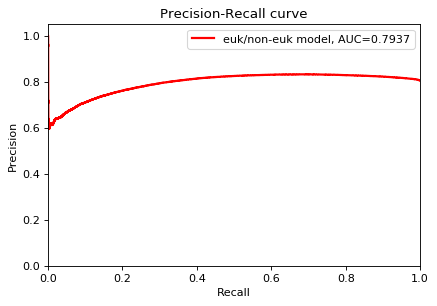

In [55]:
        lw = 2
        plt.figure(figsize=(6, 4), dpi=80)
        plt.clf()
        plt.plot(recall_euk, precision_euk, lw=lw, color='red',
                 label='euk/non-euk model, AUC={0:0.4f}'.format(auprc_euk))

        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('Precision-Recall curve')
        plt.legend(loc="upper right")



#### Euk/non-Euk itself does not perform very well using the MEGA annotation as ground truth

#### it's still possible, the euk/non-euk works for some family......

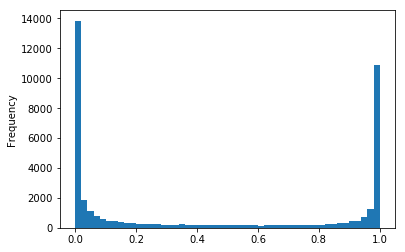

In [56]:
new_table[new_table.top_label=='Eukaryota'].score_euk_non_euk.plot.hist(bins=50)

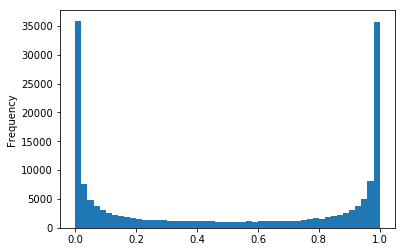

In [57]:
new_table[new_table.top_label!='Eukaryota'].score_euk_non_euk.plot.hist(bins=50)

#### This means removing low euk/non-euk score contigs, will not remove many real virus

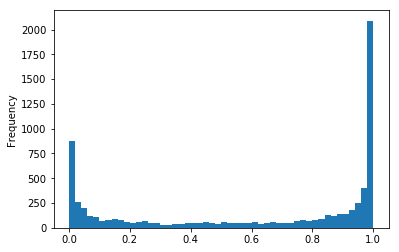

In [58]:
new_table[new_table.label==1].score_euk_non_euk.plot.hist(bins=50)

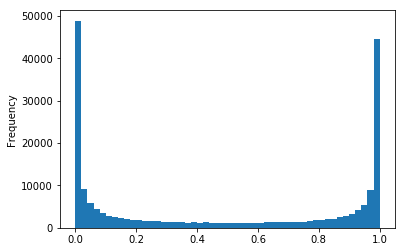

In [59]:
new_table[new_table.label==0].score_euk_non_euk.plot.hist(bins=50)

In [60]:
len(new_table[new_table.probability>=0.9])

34939

In [61]:
len(new_table[new_table.probability>=0.9][new_table.label==1.0])

/Users/qingpeng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


3882

In [62]:
len(new_table[new_table.probability>=0.9][new_table.label==0.0])

/Users/qingpeng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


31057

In [63]:
len(new_table[new_table.probability<=0.1])

111998

In [64]:
len(new_table[new_table.probability<=0.1][new_table.label==1.0])

/Users/qingpeng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


558

In [65]:
len(new_table[new_table.probability<=0.1][new_table.label==0.0])

/Users/qingpeng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


111440

In [66]:
print(len(new_table[new_table.probability_filter_out_euk4>=0.9]))
print(len(new_table[new_table.probability_filter_out_euk4>=0.9][new_table.label==1.0]))
print(len(new_table[new_table.probability_filter_out_euk4>=0.9][new_table.label==0.0]))
print(len(new_table[new_table.probability_filter_out_euk4<=0.1]))
print(len(new_table[new_table.probability_filter_out_euk4<=0.1][new_table.label==1.0]))
print(len(new_table[new_table.probability_filter_out_euk4<=0.1][new_table.label==0.0]))


AttributeError: 'DataFrame' object has no attribute 'probability_filter_out_euk4'

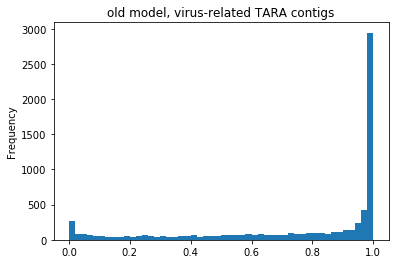

In [67]:
new_table[new_table.label==1.0].probability.plot.hist(bins=50, title = 'old model, virus-related TARA contigs')

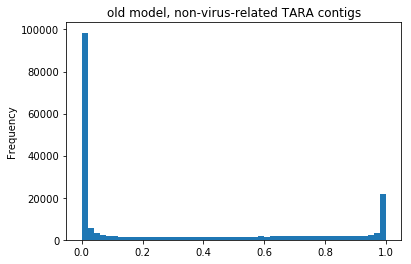

In [68]:
new_table[new_table.label==0.0].probability.plot.hist(bins=50, title = 'old model, non-virus-related TARA contigs')

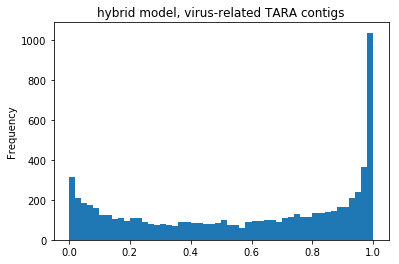

In [69]:
new_table[new_table.label==1.0].hybrid_probability.plot.hist(bins=50, title = 'hybrid model, virus-related TARA contigs')

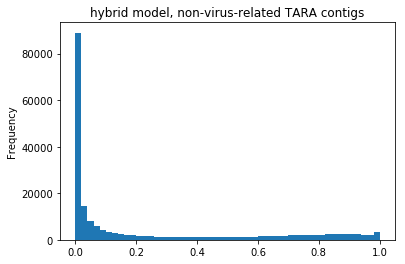

In [70]:
new_table[new_table.label==0.0].hybrid_probability.plot.hist(bins=50, title = 'hybrid model, non-virus-related TARA contigs')

In [71]:
Micromonas_table = new_table[(
        new_table.tax_name=='Micromonas') |(new_table.tax_name=='Micromonas pusilla CCMP1545')|(
        new_table.tax_name=='Micromonas commoda')]

In [126]:
Micromonas_table.to_csv("Micromonas_table.csv")

#### most of micromonas contigs has lower euk/non-euk score, prone to be euk....

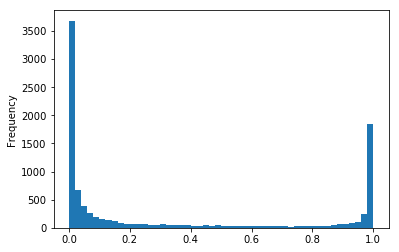

In [72]:
Micromonas_table.score_euk_non_euk.plot.hist(bins=50)

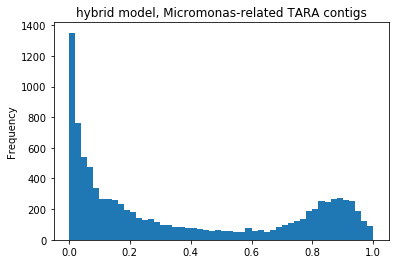

In [73]:
Micromonas_table.hybrid_probability.plot.hist(bins=50, title = 'hybrid model, Micromonas-related TARA contigs')

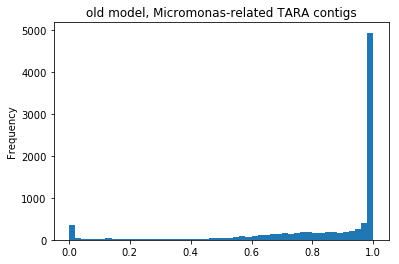

In [74]:
Micromonas_table.probability.plot.hist(bins=50, title = 'old model, Micromonas-related TARA contigs')

####  will  remove many prediction 1.0 contigs... by euk/non-euk model filtering

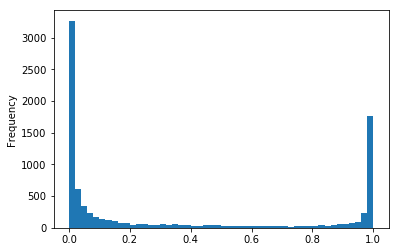

In [75]:
Micromonas_table[Micromonas_table.prediction==1.0].score_euk_non_euk.plot.hist(bins=50)

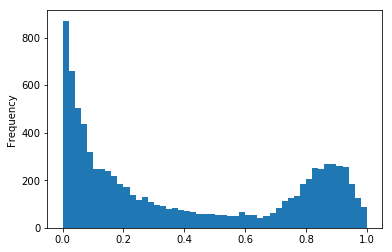

In [76]:
Micromonas_table[Micromonas_table.prediction==1.0].hybrid_probability.plot.hist(bins=50)

In [77]:
sub_table = new_table.loc[:,['probability','hybrid_probability','label','tax_id','rank','tax_name']]

In [78]:
sub_table.head()

,probability,hybrid_probability,label,tax_id,rank,tax_name
0,0.000375,0.000097,0.0,1236,class,Gammaproteobacteria
1,0.000088,0.000032,0.0,254161,species,Pseudomonas pachastrellae
2,0.000041,0.000019,0.0,254161,species,Pseudomonas pachastrellae
3,0.000056,0.000021,0.0,286,genus,Pseudomonas
4,0.000040,0.000018,0.0,286,genus,Pseudomonas


In [79]:
grouped = sub_table.groupby(['label'])

In [80]:
import pandas

0.0         Axes(0.1,0.15;0.363636x0.75)
1.0    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

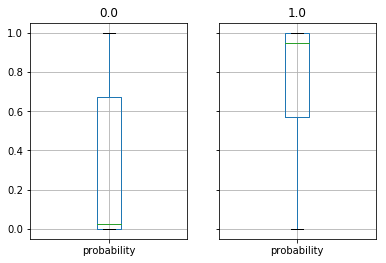

In [81]:
pandas.core.groupby.DataFrameGroupBy.boxplot(grouped, column=['probability'])

0.0         Axes(0.1,0.15;0.363636x0.75)
1.0    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

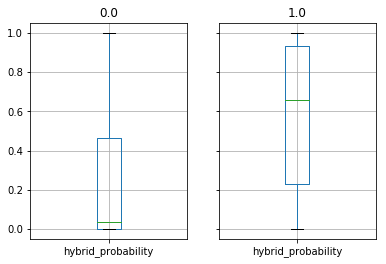

In [82]:
pandas.core.groupby.DataFrameGroupBy.boxplot(grouped, column=['hybrid_probability'])

In [83]:
predict_nonvirus = sub_table.groupby(['label']).get_group(0.0)

In [84]:
predict_nonvirus.head()

,probability,hybrid_probability,label,tax_id,rank,tax_name
0,0.000375,0.000097,0.0,1236,class,Gammaproteobacteria
1,0.000088,0.000032,0.0,254161,species,Pseudomonas pachastrellae
2,0.000041,0.000019,0.0,254161,species,Pseudomonas pachastrellae
3,0.000056,0.000021,0.0,286,genus,Pseudomonas
4,0.000040,0.000018,0.0,286,genus,Pseudomonas


In [85]:
predict_nonvirus[predict_nonvirus.probability>0.99].describe()

,probability,hybrid_probability,label,tax_id
count,19360.000000,19360.000000,19360.0,1.936000e+04
mean,0.998376,0.379285,0.0,3.044789e+05
std,0.002465,0.379769,0.0,4.887216e+05
min,0.990001,0.000009,0.0,-2.000000e+00
25%,0.997727,0.037893,0.0,5.653000e+03
50%,0.999668,0.205307,0.0,5.750600e+04
75%,0.999984,0.778857,0.0,2.965870e+05
max,1.000000,1.000000,0.0,1.904754e+06


In [86]:
grouped = predict_nonvirus.loc[:,['probability','hybrid_probability','rank']].groupby(['rank'])

In [87]:
predict_nonvirus_rank = predict_nonvirus.loc[:,['probability','hybrid_probability','rank']]

In [88]:
def convert_rank(rank):
    if rank == 'no rank':
        return 'no rank'
    else:
        return 'rank'
    

In [89]:
predict_nonvirus_rank['no_rank'] = predict_nonvirus_rank['rank'].map(convert_rank)

In [90]:
predict_nonvirus_rank.head()

,probability,hybrid_probability,rank,no_rank
0,0.000375,0.000097,class,rank
1,0.000088,0.000032,species,rank
2,0.000041,0.000019,species,rank
3,0.000056,0.000021,genus,rank
4,0.000040,0.000018,genus,rank


In [91]:
predict_nonvirus_rank_subset = predict_nonvirus_rank[(predict_nonvirus_rank['rank'] =='class') | (predict_nonvirus_rank['rank'] =='family') | (predict_nonvirus_rank['rank'] =='genus')\
                      | (predict_nonvirus_rank['rank'] =='kingdom')| (predict_nonvirus_rank['rank'] =='no rank')| (predict_nonvirus_rank['rank'] =='order')\
                      | (predict_nonvirus_rank['rank'] =='phylum')| (predict_nonvirus_rank['rank'] =='species')| (predict_nonvirus_rank['rank'] =='superkingdom')]


In [92]:
predict_nonvirus_rank_grouped = predict_nonvirus_rank.groupby(['no_rank'])

In [93]:
predict_nonvirus_rank_grouped.describe()

hybrid_probability   probability
no_rank                                        
no rank count        3.529600e+04  3.529600e+04
        mean         2.936867e-01  4.052231e-01
        std          3.617446e-01  4.146629e-01
        min          5.826176e-16  6.163252e-27
        25%          4.863638e-03  6.570104e-04
        50%          6.065341e-02  2.471569e-01
        75%          6.605304e-01  8.560335e-01
        max          9.999997e-01  1.000000e+00
rank    count        1.659650e+05  1.659650e+05
        mean         2.267918e-01  2.874665e-01
        std          3.205747e-01  3.776077e-01
        min          1.114855e-20  1.608784e-40
        25%          2.087748e-03  7.368988e-05
        50%          3.137109e-02  1.627734e-02
        75%          4.186605e-01  6.101869e-01
        max          1.000000e+00  1.000000e+00

no rank         Axes(0.1,0.15;0.363636x0.75)
rank       Axes(0.536364,0.15;0.363636x0.75)
dtype: object

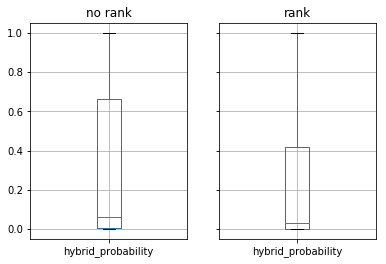

In [94]:
predict_nonvirus_rank_grouped.boxplot(column=['hybrid_probability'])

no rank         Axes(0.1,0.15;0.363636x0.75)
rank       Axes(0.536364,0.15;0.363636x0.75)
dtype: object

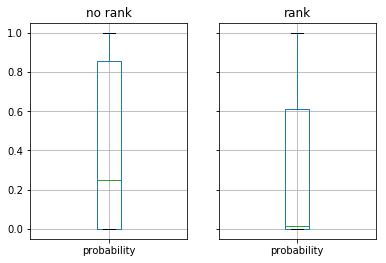

In [95]:
predict_nonvirus_rank_grouped.boxplot(column=['probability'])

In [96]:
9169.0/111440

0.08227745872218234

In [97]:
tax_name_count_99 = predict_nonvirus[predict_nonvirus.probability>0.99].groupby('tax_name').size().reset_index()

In [98]:
tax_name_count_99['percent_99'] = tax_name_count_99[0].apply(lambda x: 100*x/float(tax_name_count_99.sum()))

In [99]:
tax_name_count_99.head()

,tax_name,0,percent_99
0,-2,59,0.304752
1,Acanthamoeba castellanii str. Neff,4,0.020661
2,Acidimicrobiia,1,0.005165
3,Acidithiobacillales bacterium SG8_45,4,0.020661
4,Acinetobacter,8,0.041322


In [100]:
tax_name_count_01 = predict_nonvirus[predict_nonvirus.probability<0.01].groupby('tax_name').size().reset_index()

In [101]:
tax_name_count_01['percent_01'] = tax_name_count_01[0].apply(lambda x: 100*x/float(tax_name_count_01.sum()))

In [102]:
tax_name_count_01.head()


,tax_name,0,percent_01
0,-2,30,0.032458
1,Acanthamoeba castellanii,1,0.001082
2,Acidimicrobiia,1,0.001082
3,Acidobacteria,7,0.007574
4,Acinetobacter,920,0.995380


In [103]:
tax_name = pd.merge(tax_name_count_99,tax_name_count_01,how='inner',on=['tax_name'])

In [104]:
tax_name.head()

,tax_name,0_x,percent_99,0_y,percent_01
0,-2,59,0.304752,30,0.032458
1,Acidimicrobiia,1,0.005165,1,0.001082
2,Acinetobacter,8,0.041322,920,0.995380
3,Actiniaria,6,0.030992,1,0.001082
4,Actinobacteria,42,0.216942,178,0.192584


In [105]:
tax_name['increase'] = tax_name.apply(lambda x:x['percent_99']/x['percent_01'], axis=1)

In [106]:
tax_name.sort_values(by='increase')

,tax_name,0_x,percent_99,0_y,percent_01,increase
325,Rhodobacterales bacterium HTCC2255,2,0.010331,1225,1.325370,0.007794
323,Rhodobacteraceae bacterium SB2,1,0.005165,310,0.335400,0.015400
444,unclassified Nitrosomonadales,1,0.005165,249,0.269402,0.019173
251,Oceanospirillales,2,0.010331,366,0.395988,0.026088
293,Porticoccaceae,1,0.005165,181,0.195830,0.026376
370,Synechococcales,2,0.010331,362,0.391660,0.026376
388,Verrucomicrobia,2,0.010331,345,0.373268,0.027676
324,Rhodobacterales,4,0.020661,659,0.712995,0.028978
82,Candidatus Thioglobus singularis,7,0.036157,1100,1.190128,0.030381
332,SAR116 cluster,1,0.005165,145,0.156881,0.032925


In [107]:
tax_name.sort_values(by='percent_99')

,tax_name,0_x,percent_99,0_y,percent_01,increase
116,Cryomorphaceae bacterium BACL22 MAG-120619-bin32,1,0.005165,20,0.021639,0.238706
61,Candidatus Aquiluna,1,0.005165,7,0.007574,0.682017
193,Isochrysidales,1,0.005165,3,0.003246,1.591374
59,Campylobacterales,1,0.005165,4,0.004328,1.193530
92,Chlorophyceae,1,0.005165,1,0.001082,4.774122
195,Leeuwenhoekiella blandensis,1,0.005165,64,0.069244,0.074596
281,Peronosporales,1,0.005165,2,0.002164,2.387061
198,Lentisphaerae,1,0.005165,8,0.008655,0.596765
398,Xanthomonadaceae,1,0.005165,18,0.019475,0.265229
399,alpha proteobacterium HIMB114,1,0.005165,11,0.011901,0.434011


In [108]:
1587.0/31057

0.05109959107447597

In [109]:
predict_nonvirus[predict_nonvirus.probability>0.9].groupby('tax_id').size()

tax_id
-2           128
 1          1744
 2          1587
 22           15
 29           16
 85            6
 126          11
 137           1
 146           2
 226         731
 237          12
 286         178
 287           5
 316          13
 356          43
 444           4
 469          17
 506           1
 520           6
 531           5
 543           5
 562          14
 641           9
 657          15
 662          20
 766           6
 838          11
 933           4
 958           8
 963          12
            ... 
 1783270      39
 1783272      52
 1783276       6
 1794811      37
 1797909       9
 1798416       7
 1798559       4
 1802260       7
 1802339       1
 1802371      18
 1805240       9
 1812810       9
 1813033       3
 1817868      27
 1822214       3
 1822215       3
 1822250     124
 1822263       7
 1853229       5
 1853230      13
 1853232       2
 1855377      17
 1856405      16
 1868282       1
 1873462      16
 1890424       8
 1890450       9
 189119

In [110]:
predict_nonvirus[predict_nonvirus.probability>0.9].groupby('rank').size()

rank
-2                   128
206350                25
383630                 3
class               1224
cohort                18
family              2846
genus               4812
infraclass            31
infraorder             1
kingdom              330
no rank             7827
order               1750
phylum              1642
species             7654
species group         13
species subgroup       1
subclass              49
subfamily              4
subkingdom             5
suborder              20
subphylum             47
superclass             2
superkingdom        2624
superorder             1
dtype: int64

In [111]:
predict_nonvirus[predict_nonvirus.probability<0.1].groupby('rank').size()

rank
-2                     45
171193                  4
206350                286
383630                298
class               16530
cohort                  9
family              11575
genus               16108
infraclass              9
infraorder              1
kingdom               280
no rank             16132
order                7635
phylum               9990
species             19646
species group          94
species subgroup        2
subclass               44
subfamily             109
subkingdom              1
suborder                5
subphylum              50
subspecies             10
superclass              1
superfamily             1
superkingdom        12575
dtype: int64

In [112]:
predict_virus = sub_table.groupby(['label']).get_group(1.0)

In [113]:
result = pd.read_csv('/Users/qingpeng/shred.fa.score',sep=' ',header=None,names=['probability','prediction'])

IOError: File /Users/qingpeng/shred.fa.score does not exist

In [ ]:
result

In [ ]:
result.probability.plot.hist(bins=100)